In [1]:
# Import dependencies
import pandas as pd
import numpy as np

In [2]:
# Read the file into pandas dataframe
file_path = "../Resources/country_oil-and-gas-production-and-transport_emissions.csv"
original_oil_gas_df = pd.read_csv(file_path)
original_oil_gas_df.sample(5)

,iso3_country,start_time,end_time,original_inventory_sector,gas,emissions_quantity,emissions_quantity_units,temporal_granularity,created_date,modified_date
731,TCD,2015-01-01 00:00:00,2015-12-31 00:00:00,oil-and-gas-production-and-transport,co2,1280418.063,tonnes,annual,2022-09-05 15:48:05.471737,NaN
7586,YEM,2021-01-01 00:00:00,2021-12-31 00:00:00,oil-and-gas-production-and-transport,n2o,0.000,tonnes,annual,2022-09-05 15:48:05.558246,NaN
3106,CPV,2015-01-01 00:00:00,2015-12-31 00:00:00,oil-and-gas-production-and-transport,co2e_100yr,NaN,tonnes,annual,2022-09-05 15:48:05.566985,NaN
8042,CYM,2017-01-01 00:00:00,2017-12-31 00:00:00,oil-and-gas-production-and-transport,n2o,0.000,tonnes,annual,2022-09-05 15:48:05.620856,NaN
6373,AIA,2020-01-01 00:00:00,2020-12-31 00:00:00,oil-and-gas-production-and-transport,co2e_100yr,NaN,tonnes,annual,2022-09-05 15:48:05.681356,NaN


## Get overview of data

In [3]:
# Rows and columns of data set
original_oil_gas_df.shape

(8785, 10)

In [4]:
# Available columns
original_oil_gas_df.columns

Index(['iso3_country', 'start_time', 'end_time', 'original_inventory_sector',
       'gas', 'emissions_quantity', 'emissions_quantity_units',
       'temporal_granularity', 'created_date', 'modified_date'],
      dtype='object')

In [5]:
# Datatypes of columns
original_oil_gas_df.dtypes

iso3_country                  object
start_time                    object
end_time                      object
original_inventory_sector     object
gas                           object
emissions_quantity           float64
emissions_quantity_units      object
temporal_granularity          object
created_date                  object
modified_date                 object
dtype: object

In [6]:
# Descriptive statistics
original_oil_gas_df.describe()

,emissions_quantity
count,4.937000e+03
mean,2.609297e+07
std,1.369324e+08
min,0.000000e+00
25%,0.000000e+00
50%,3.706460e+02
75%,2.375247e+06
max,2.359530e+09


## Data clean and prep

In [7]:
# Assign original dataframe to another that will be modified
oil_gas_df = original_oil_gas_df
oil_gas_df.head()

,iso3_country,start_time,end_time,original_inventory_sector,gas,emissions_quantity,emissions_quantity_units,temporal_granularity,created_date,modified_date
0,AGO,2015-01-01 00:00:00,2015-12-31 00:00:00,oil-and-gas-production-and-transport,n2o,0.0,tonnes,annual,2022-09-05 15:48:05.453485,NaN
1,TON,2021-01-01 00:00:00,2021-12-31 00:00:00,oil-and-gas-production-and-transport,co2,NaN,tonnes,annual,2022-09-05 15:48:05.698281,NaN
2,TON,2021-01-01 00:00:00,2021-12-31 00:00:00,oil-and-gas-production-and-transport,ch4,NaN,tonnes,annual,2022-09-05 15:48:05.698292,NaN
3,TON,2021-01-01 00:00:00,2021-12-31 00:00:00,oil-and-gas-production-and-transport,co2e_100yr,NaN,tonnes,annual,2022-09-05 15:48:05.698302,NaN
4,TON,2021-01-01 00:00:00,2021-12-31 00:00:00,oil-and-gas-production-and-transport,co2e_20yr,NaN,tonnes,annual,2022-09-05 15:48:05.698308,NaN


In [8]:
# Original number of rows
oil_gas_df.shape[0]

8785

In [9]:
# Original number of columns
oil_gas_df.shape[1]

10

In [10]:
# Find the null counts in each column
oil_gas_df.isnull().sum()

iso3_country                    0
start_time                      0
end_time                        0
original_inventory_sector       0
gas                             0
emissions_quantity           3848
emissions_quantity_units        0
temporal_granularity            0
created_date                    0
modified_date                7549
dtype: int64

In [11]:
# Drop temporal_granularity column: All values are null
# Drop created date, modified_date, emissions_quantity_units columns: provide no beneficial information
oil_gas_df = oil_gas_df.drop(['temporal_granularity','emissions_quantity_units','created_date','modified_date'], axis=1)
oil_gas_df.sample(5)

,iso3_country,start_time,end_time,original_inventory_sector,gas,emissions_quantity
1062,TCD,2016-01-01 00:00:00,2016-12-31 00:00:00,oil-and-gas-production-and-transport,ch4,46291.149390
7597,TUR,2015-01-01 00:00:00,2015-12-31 00:00:00,oil-and-gas-production-and-transport,n2o,0.000000
6852,KOR,2021-01-01 00:00:00,2021-12-31 00:00:00,oil-and-gas-production-and-transport,co2e_20yr,529551.181600
1933,FRA,2019-01-01 00:00:00,2019-12-31 00:00:00,oil-and-gas-production-and-transport,ch4,7036.684331
1928,EST,2019-01-01 00:00:00,2019-12-31 00:00:00,oil-and-gas-production-and-transport,co2,253787.346400


In [12]:
oil_gas_df.dtypes

iso3_country                  object
start_time                    object
end_time                      object
original_inventory_sector     object
gas                           object
emissions_quantity           float64
dtype: object

In [13]:
# Retrieve year from start_time
oil_gas_df['year'] = pd.DatetimeIndex(oil_gas_df['end_time']).year
oil_gas_df.head()

,iso3_country,start_time,end_time,original_inventory_sector,gas,emissions_quantity,year
0,AGO,2015-01-01 00:00:00,2015-12-31 00:00:00,oil-and-gas-production-and-transport,n2o,0.0,2015
1,TON,2021-01-01 00:00:00,2021-12-31 00:00:00,oil-and-gas-production-and-transport,co2,NaN,2021
2,TON,2021-01-01 00:00:00,2021-12-31 00:00:00,oil-and-gas-production-and-transport,ch4,NaN,2021
3,TON,2021-01-01 00:00:00,2021-12-31 00:00:00,oil-and-gas-production-and-transport,co2e_100yr,NaN,2021
4,TON,2021-01-01 00:00:00,2021-12-31 00:00:00,oil-and-gas-production-and-transport,co2e_20yr,NaN,2021


In [14]:
# Drop start_time and end_time columns
oil_gas_df = oil_gas_df.drop(['start_time','end_time'], axis=1)
oil_gas_df.sample(5)

,iso3_country,original_inventory_sector,gas,emissions_quantity,year
1374,PHL,oil-and-gas-production-and-transport,co2,743875.99360,2017
106,TWN,oil-and-gas-production-and-transport,ch4,NaN,2021
2351,JOR,oil-and-gas-production-and-transport,co2e_100yr,62610.54519,2020
7180,IRL,oil-and-gas-production-and-transport,n2o,0.00000,2017
4562,VCT,oil-and-gas-production-and-transport,ch4,NaN,2017


In [15]:
# Check for empty values/NaN in emissions_quantity 
oil_gas_df['emissions_quantity'].isnull().sum()

3848

44% of values in emissions_quantity are null or empty

In [17]:
# Create a new dataframe by removing rows with missing values
oil_gas_df = oil_gas_df.dropna(axis='rows', how='any')
oil_gas_df.head()

,iso3_country,original_inventory_sector,gas,emissions_quantity,year
0,AGO,oil-and-gas-production-and-transport,n2o,0.0,2015
85,LVA,oil-and-gas-production-and-transport,co2,0.0,2021
86,LVA,oil-and-gas-production-and-transport,ch4,0.0,2021
87,LVA,oil-and-gas-production-and-transport,co2e_100yr,0.0,2021
88,LVA,oil-and-gas-production-and-transport,co2e_20yr,0.0,2021


In [18]:
oil_gas_df = oil_gas_df[oil_gas_df['emissions_quantity']!=0]

In [19]:
oil_gas_df.shape

(2516, 5)

In [29]:
oil_gas_df.rename(columns = {'iso3_country':'country', 'original_inventory_sector':'sector'}, inplace = True)
oil_gas_df.sample()

,country,sector,gas,emissions_quantity,year
2834,TTO,oil-and-gas-production-and-transport,co2e_100yr,13911602.33,2021


In [30]:
# Export the cleaned dataframe into csv
oil_gas_df.to_csv("../Resources/clean_country_oil_gas.csv")

## Data exploration

In [21]:
# Use the clean dataframe to explore
oil_gas_df.nunique()

iso3_country                   92
original_inventory_sector       1
gas                             4
emissions_quantity           2488
year                            7
dtype: int64

In [25]:
oil_gas_df['year'].value_counts()

2019    368
2020    364
2021    364
2018    360
2017    356
2015    352
2016    352
Name: year, dtype: int64

In [26]:
oil_gas_df['gas'].value_counts()

co2           629
ch4           629
co2e_100yr    629
co2e_20yr     629
Name: gas, dtype: int64

In [ ]:
oil_gas_df.rename(columns = {'iso3_country':'country', 'original_inventory_sector':'sector'}, inplace = True)

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
features = oil_gas_df[['country','sector','gas','emissions_quantity','year']]

- Label: emissions_quantity

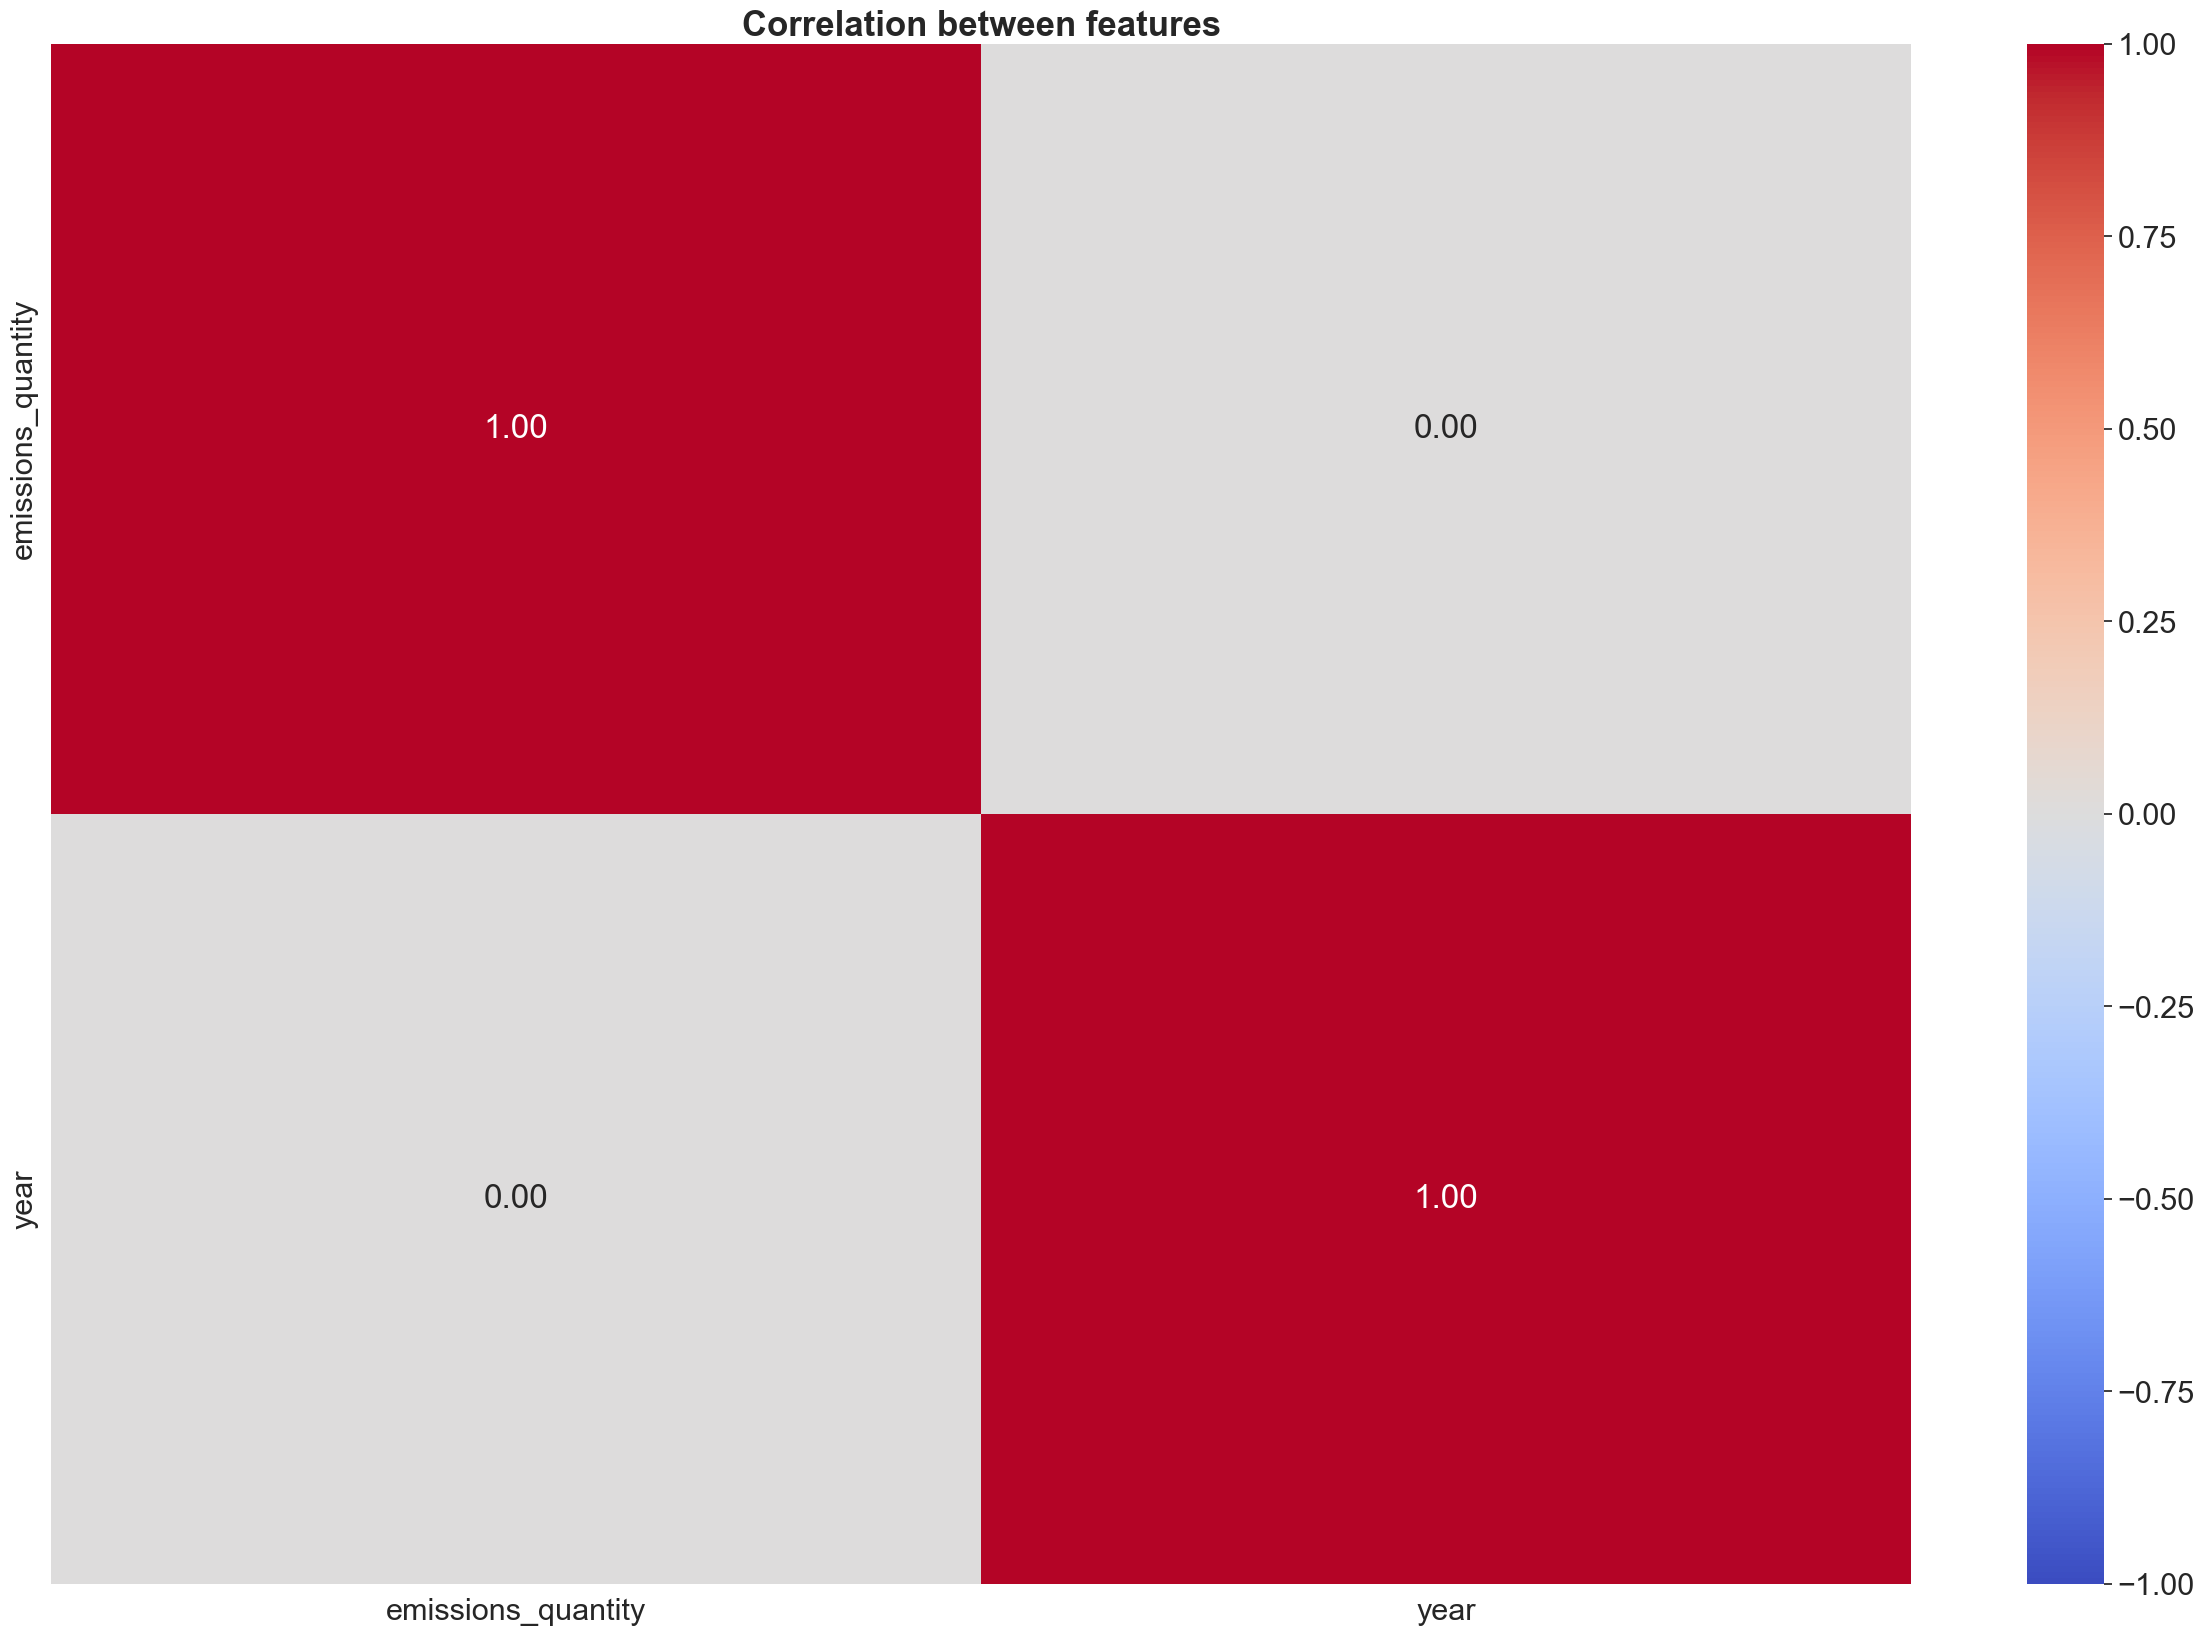

In [34]:
# Plot a correlation matrix
sns.set(font_scale=2)
f,ax=plt.subplots(figsize=(30,20))
sns.heatmap(features.corr(), annot=True, cmap='coolwarm', fmt = ".2f", center=0, vmin=-1, vmax=1)
plt.title('Correlation between features', fontsize=25, weight='bold' )
plt.show()

This dataset is discarded as it has no dependent features on label. 